Imports

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
import pickle
import sys

In [13]:
# Function to show various error measurement
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)  # MSE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    #corr = np.corrcoef(forecast, actual)[0,1]   # corr
    #mins = np.amin(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #maxs = np.amax(np.hstack([forecast[:,None], 
    #                          actual[:,None]]), axis=1)
    #minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    #return({'mape':mape, 'me':me, 'mae': mae, 
    #        'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
    #        'corr':corr, 'minmax':minmax})
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse})

In [14]:
import os
os.chdir('d:/Users/mokky/Documents/GitHub/nus-iss/PRS-PM-ISY5002-GROUP5/SystemCode')
print(os.getcwd())

d:\Users\mokky\Documents\GitHub\nus-iss\PRS-PM-ISY5002-GROUP5\SystemCode


In [15]:
file_dir = './Data Exploration/data/uc3/'
X_train_file_path = 'all_hosp_new_train_X_uc3.pkl'
y_train_file_path = 'all_hosp_data_uc3_y_train_uc3.pkl'
X_test_file_path = 'all_hosp_new_test_X_uc3.pkl'
y_test_file_path = 'all_hosp_data_uc3_y_test_uc3.pkl'

In [22]:
df_X_train = pd.read_pickle(file_dir + X_train_file_path)
df_y_train = pd.read_pickle(file_dir + y_train_file_path)
df_X_test = pd.read_pickle(file_dir + X_test_file_path)
df_y_test = pd.read_pickle(file_dir + y_test_file_path)

Creating a train and test dataset.

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df_X_train,df_y_train)

# save model to file
pickle.dump(model, open(file_dir + "uc3_linreg_model_pkl.sav", "wb"))

In [24]:
y_pred = model.predict(df_X_test)

C:\ProgramData\Anaconda3\envs\prpms\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


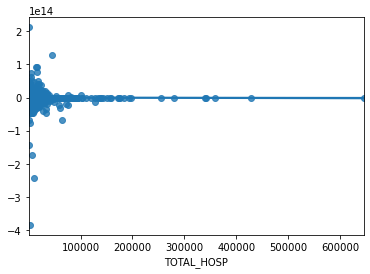

In [25]:
sns.regplot(df_y_test,y_pred)

In [26]:
# MSE
print('Mean squared error: %.2f'
      % mean_squared_error(df_y_test,y_pred, squared=True))

# RMSE
print('Root Mean squared error: %.2f'
      % mean_squared_error(df_y_test,y_pred, squared=False))

# MAE
print('Mean absolute error: %.2f'
      % mean_absolute_error(df_y_test,y_pred))

Mean squared error: 32087639831807434602577920.00
Root Mean squared error: 5664595292852.56
Mean absolute error: 540683888662.52


In [27]:
forecast_accuracy(y_pred, df_y_test)

{'mape': 128968586.85256241,
 'me': -26962606429.271862,
 'mae': 540683888662.51843,
 'mpe': -1148534.8089953386,
 'mse': 3.2087639831807435e+25,
 'rmse': 5664595292852.564}